In [2]:
#imports libraries
import pandas as pd
from statistics import stdev
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#preparing the datasets

lw = pd.read_csv("/content/london_weather.csv") #reads london weather file from contents folder
aql = pd.read_excel("/content/air-quality-london.xlsx",2,skiprows=1) #reads london air quality file from contents folder

lw["date"] = pd.to_datetime((lw["date"]),format='%Y%m%d') # converts the dates column (weather) into date values

aql = aql.drop(aql.columns[8:], axis=1) #cuts out the "London Mean Background" data as the weather dataset was measured
#closer to the roadside (near Heathrow airport)

aql["Month"][:86] = pd.to_datetime(aql["Month"][:86],format='%b-%Y')
aql["Month"] = pd.to_datetime(aql["Month"],format='%Y-%m-%d %H:%M:%S')# converts the first half of the Month column (air quality)
#into the same datetime format first then all of them into datetime values

aqlCompare = aql.copy()
lwCompare = lw[10592:14793].copy() #saves the portion of the weather data that can be compared to the air quality data
#(timeframe wise - Jan 2008 -> July 2019)


/tmp/ipython-input-2091351806.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  aql["Month"][:86] = pd.to_datetime(aql["Month"][:86],format='%b-%Y')
/tmp/ipython-input-2091351806.py:11: SettingWithCopyWarning: 
A value is trying to be set

In [4]:
print("London Weather:","\n")
print(lw.info(),"\n")
print("London Air Quality:","\n")
print(aql.info())
#Info about both datasets

London Weather: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB
None 

London Air Quality: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                      

/tmp/ipython-input-1608530695.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  lwPP["date"][i] = newDate
/tmp/ipython-input-1608530695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

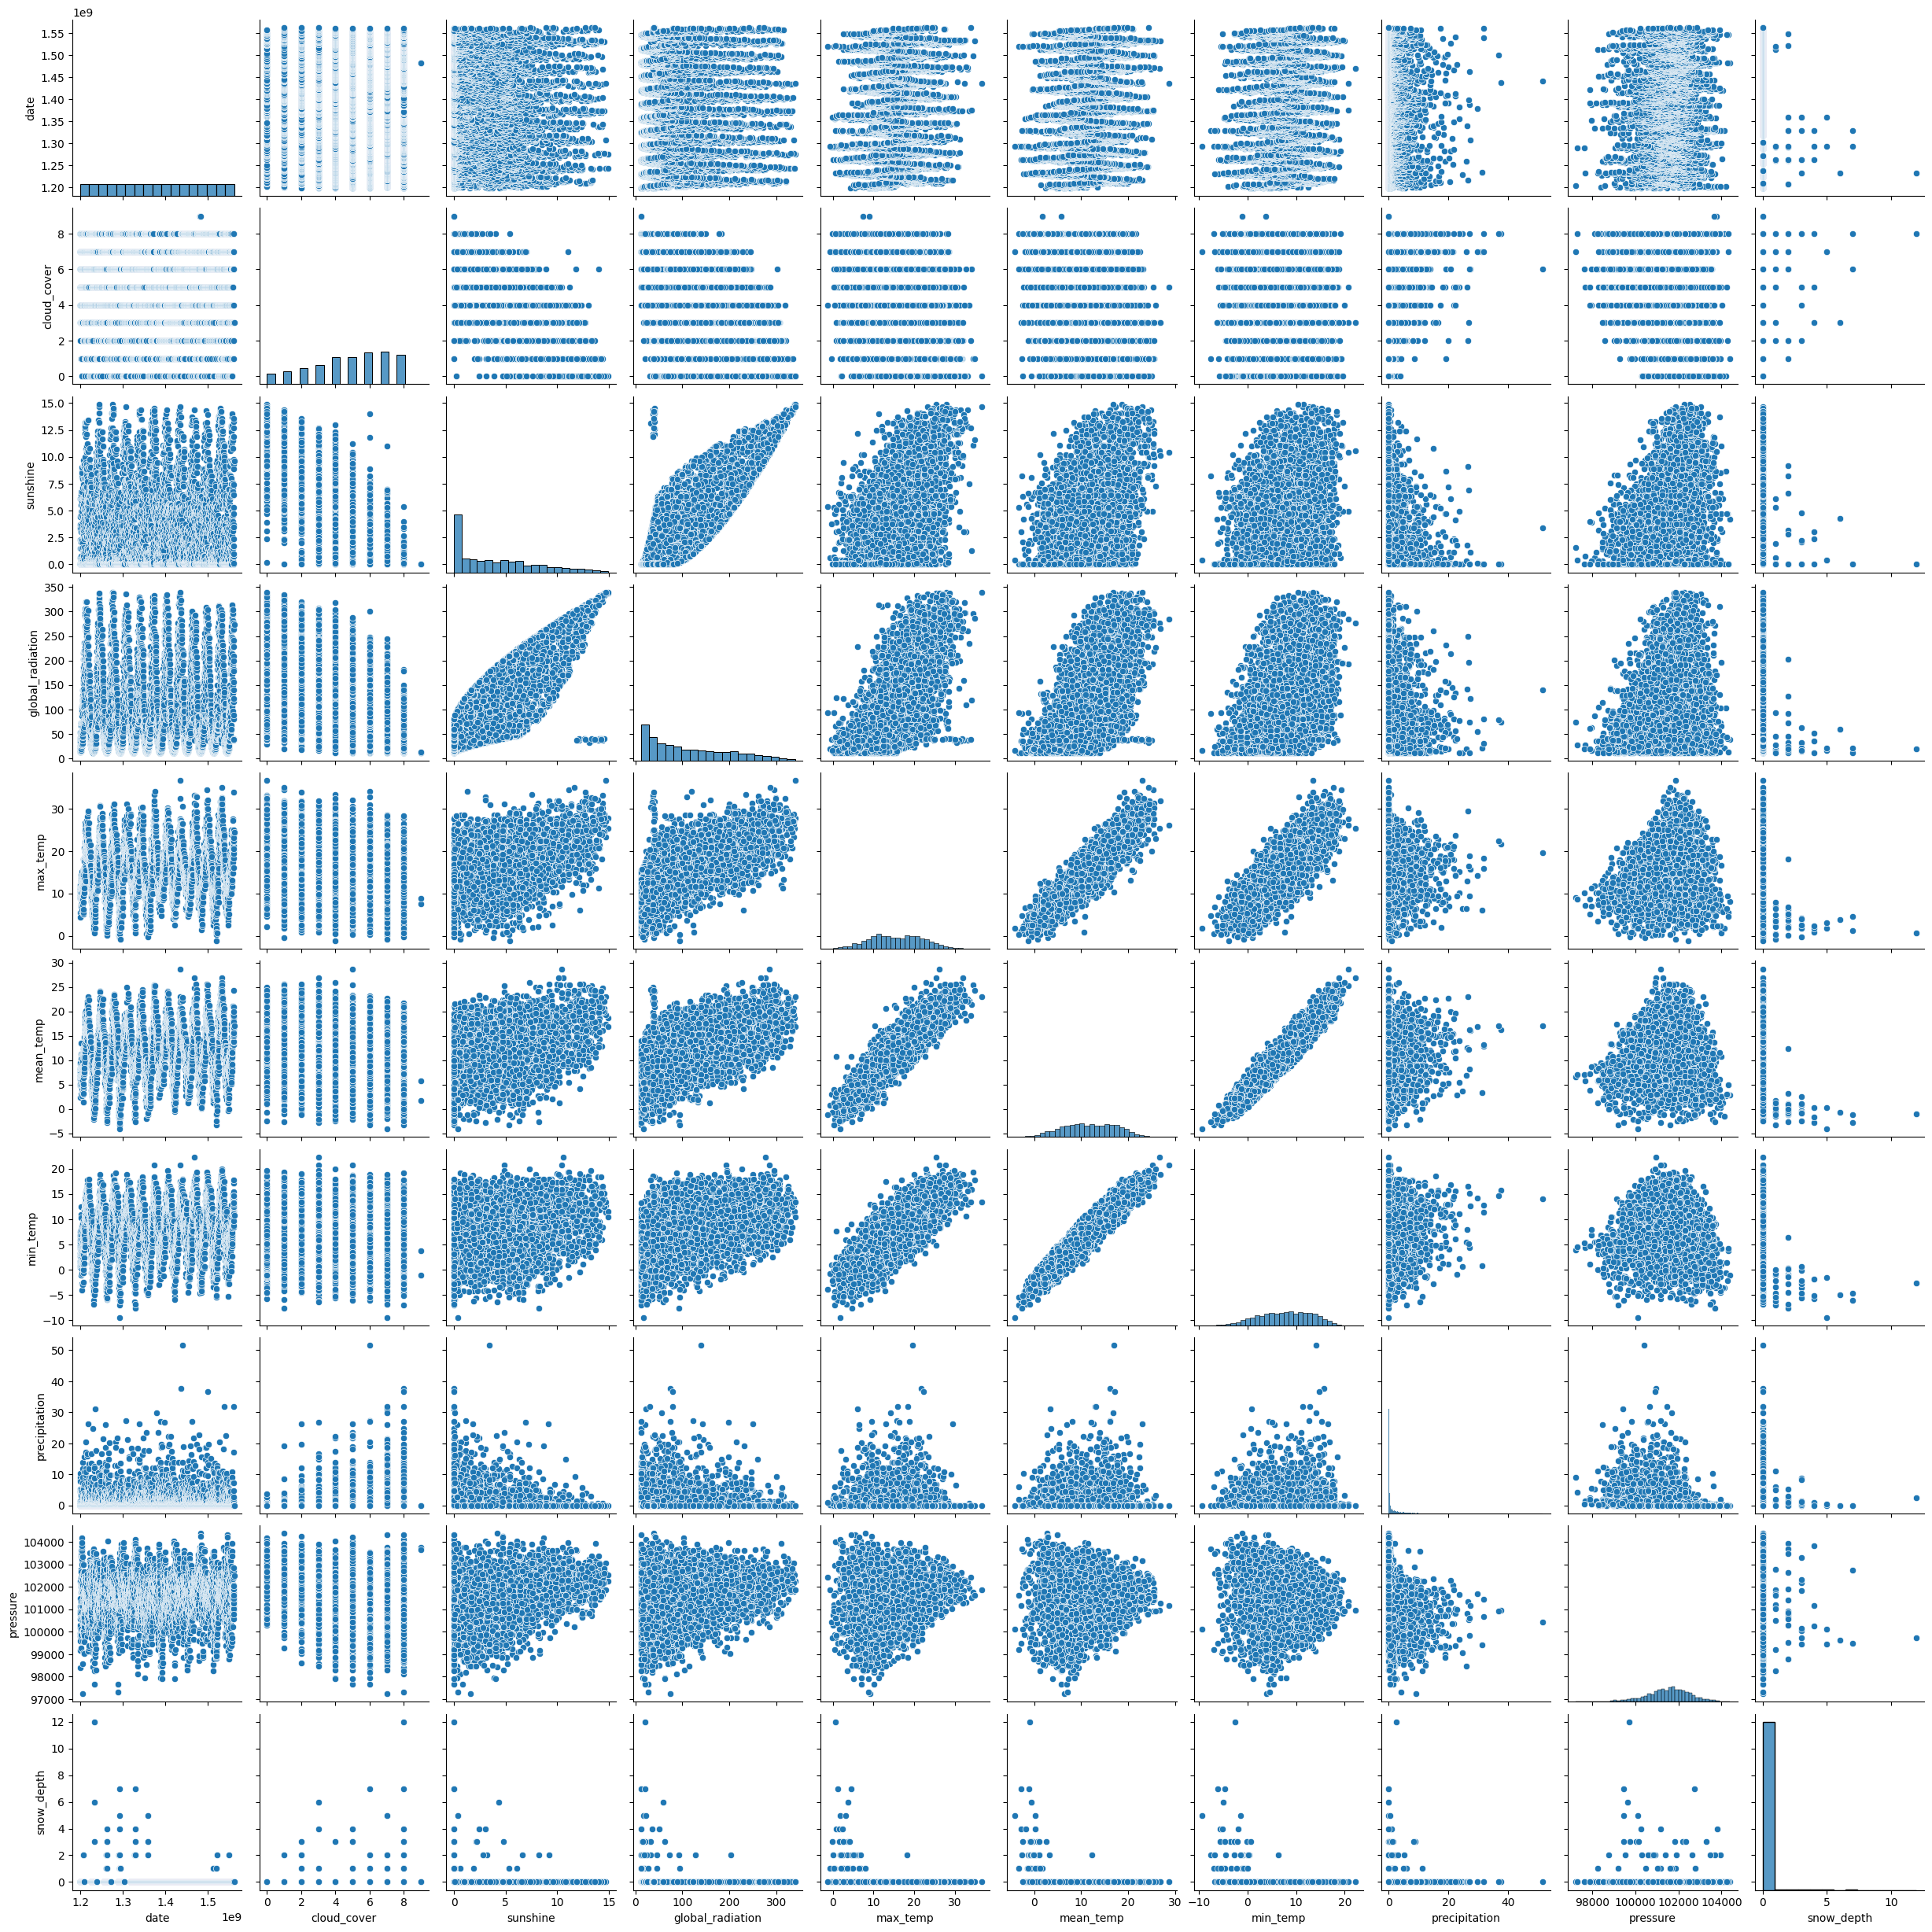

In [5]:
lwPP = lwCompare.copy()

for i in range(10592,14793):
  newDate = int((lwPP["date"])[i].timestamp())
  lwPP["date"][i] = newDate

#Only run the previous code ONCE (otherwise you must run the preparing datasets node again) or else an error will occur
#Code above produces series of data used specifically for the PairPlot (hence lwPP) as to allow dates to be part of it as well
sns.pairplot(lwPP, kind="scatter")
plt.show()

/tmp/ipython-input-2770844298.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  aqlPP["Month"][i] = newDate
/tmp/ipython-input-2770844298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

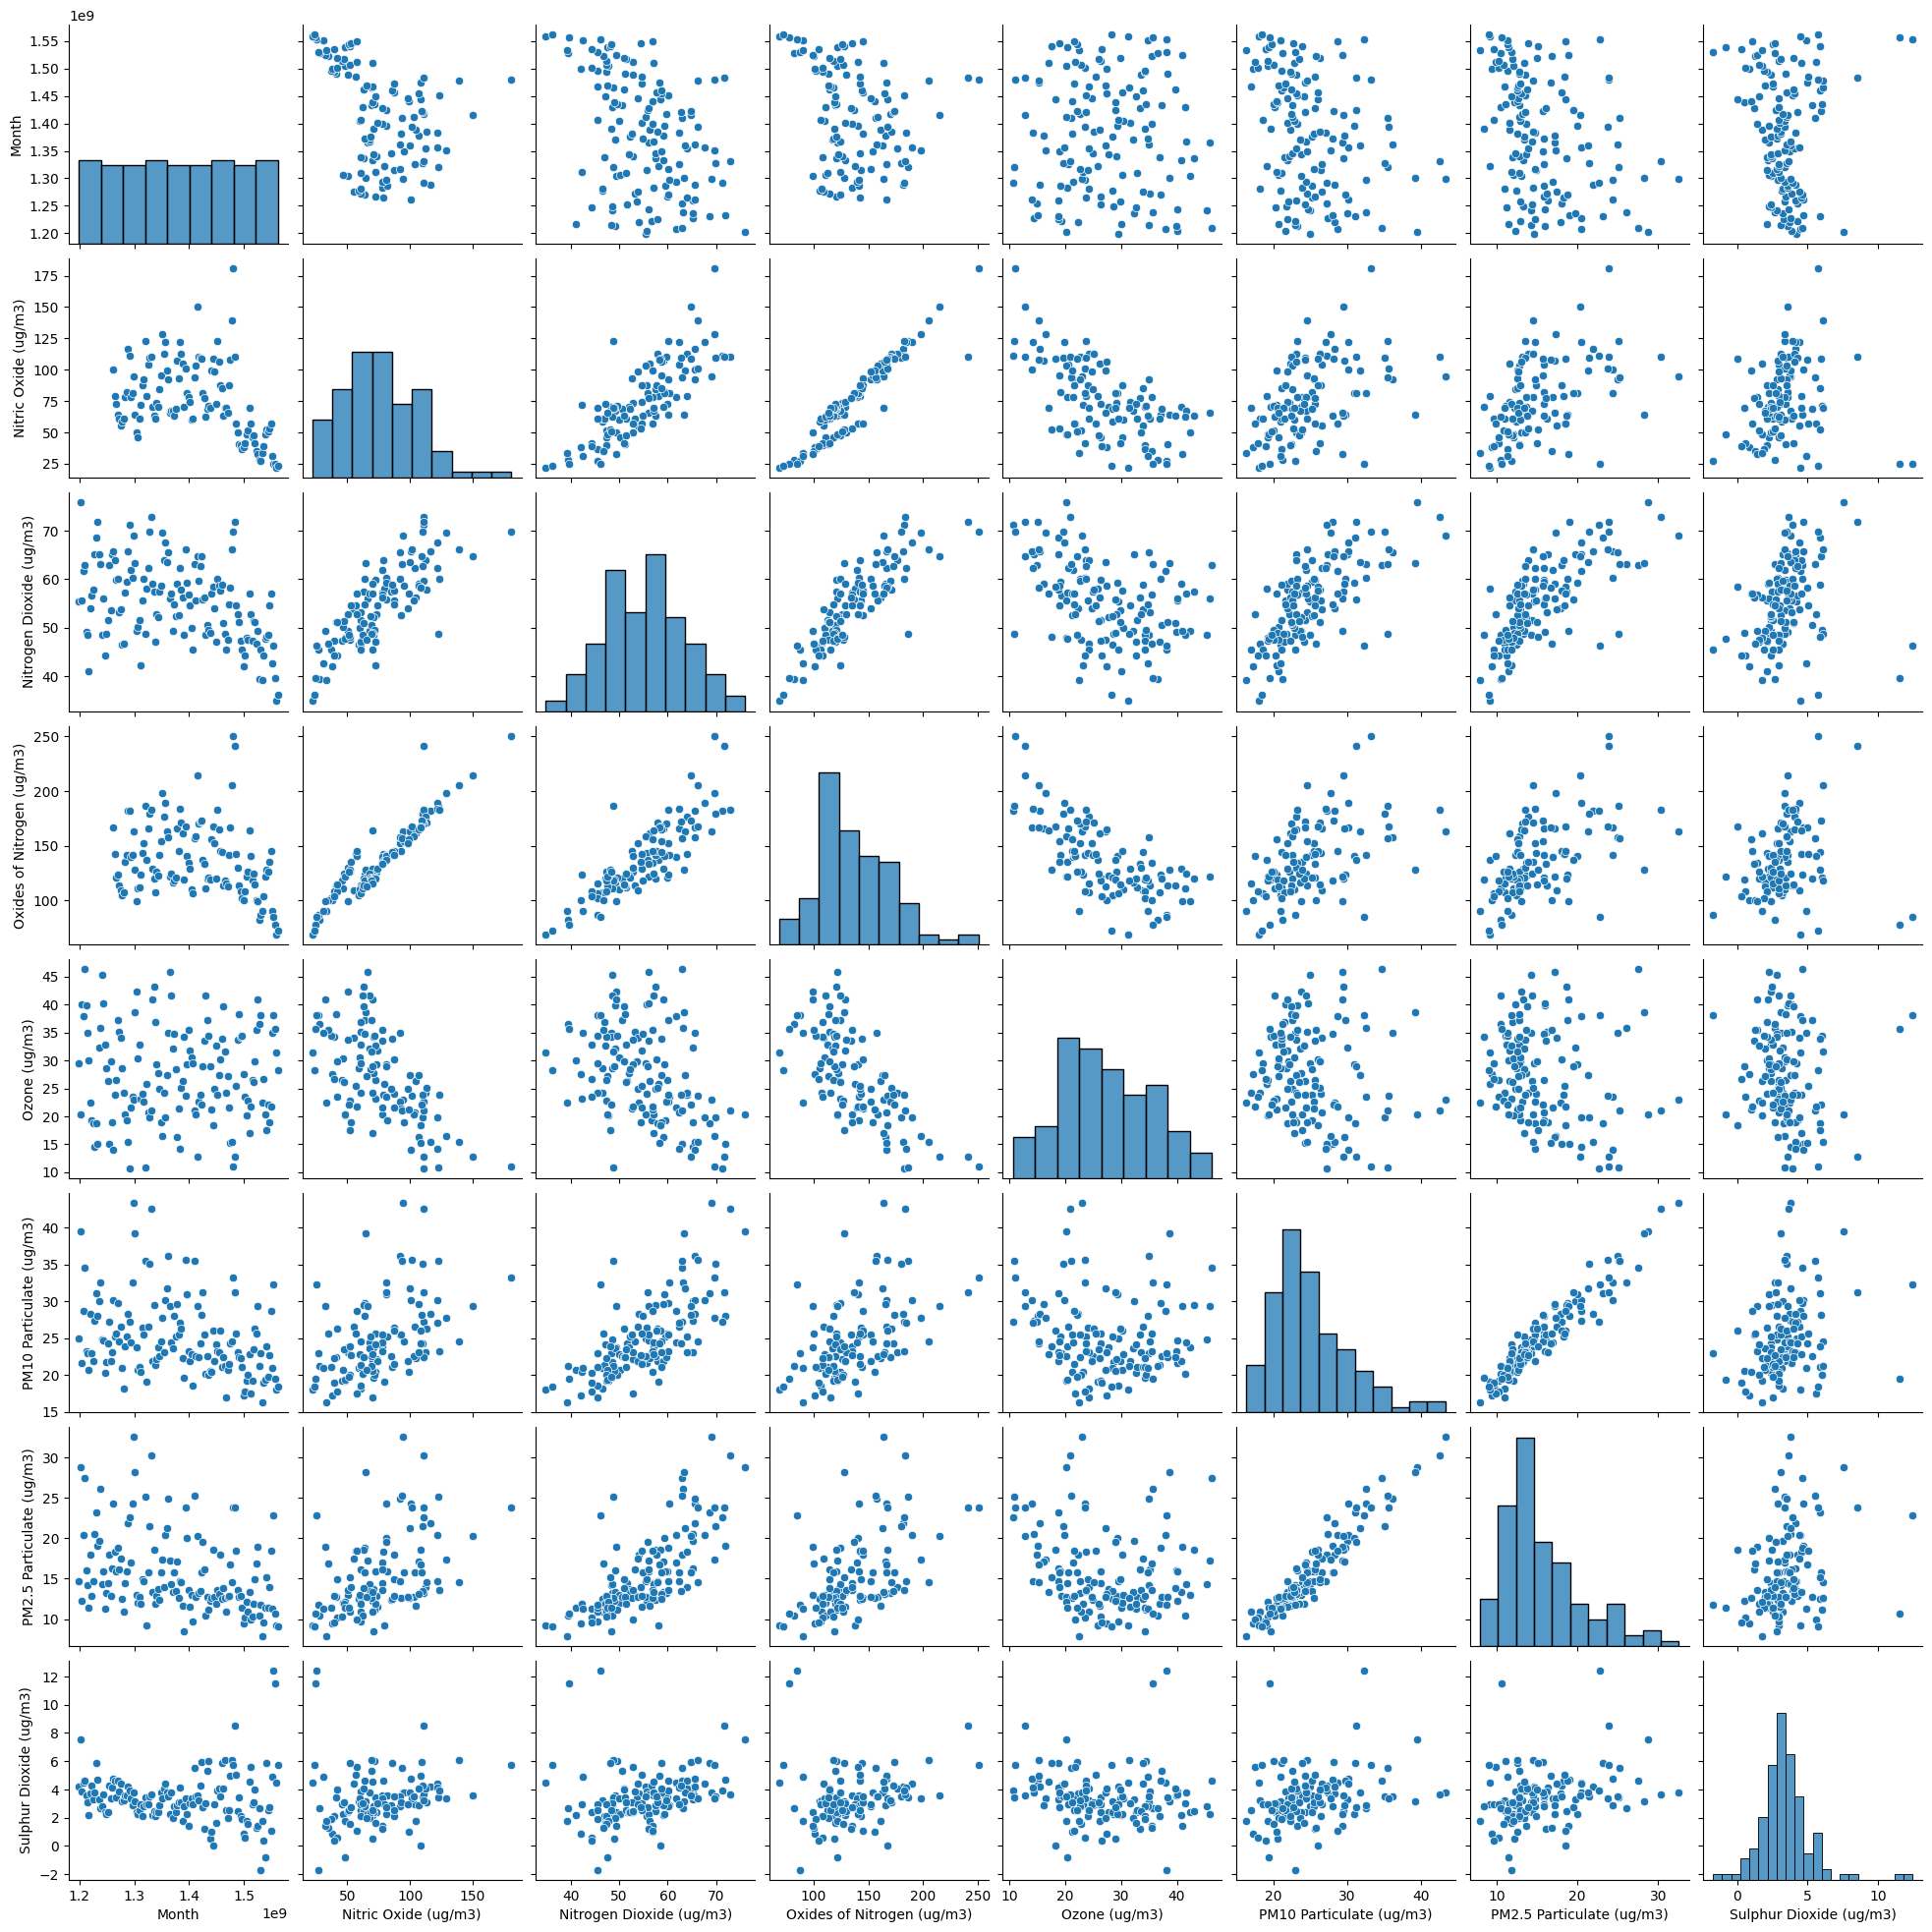

In [6]:
#Same code as above adapted for air quality dataset

aqlPP = aqlCompare.copy()
for i in range(139):
  newDate = int((aqlPP["Month"])[i].timestamp())
  aqlPP["Month"][i] = newDate

#Code above produces series of data used specifically for the PairPlot (hence aqlPP) as to allow dates to be part of it as well
sns.pairplot(aqlPP, kind="scatter")
plt.show()

In [7]:
lwCorr = lwCompare.corr(method='pearson')
print(lwCorr)
#London weather correlation matrix

                      date  cloud_cover  sunshine  global_radiation  max_temp  \
date              1.000000     0.019488  0.034154         -0.005352  0.066906   
cloud_cover       0.019488     1.000000 -0.816475         -0.545971 -0.253990   
sunshine          0.034154    -0.816475  1.000000          0.821811  0.458137   
global_radiation -0.005352    -0.545971  0.821811          1.000000  0.676571   
max_temp          0.066906    -0.253990  0.458137          0.676571  1.000000   
mean_temp         0.062988    -0.151533  0.377965          0.618771  0.912151   
min_temp          0.052868     0.030852  0.185847          0.455294  0.810780   
precipitation    -0.011962     0.238790 -0.246234         -0.175026 -0.089650   
pressure          0.062969    -0.262703  0.264158          0.177444  0.147121   
snow_depth       -0.096041     0.049676 -0.060380         -0.076822 -0.159595   

                  mean_temp  min_temp  precipitation  pressure  snow_depth  
date               0.062988  0.

In [8]:
aqlCorr = aql.corr(method='pearson')
print(aqlCorr)
#London air quality correlation matrix

                               Month  Nitric Oxide (ug/m3)  \
Month                       1.000000             -0.405267   
Nitric Oxide (ug/m3)       -0.405267              1.000000   
Nitrogen Dioxide (ug/m3)   -0.424247              0.801844   
Oxides of Nitrogen (ug/m3) -0.260657              0.935889   
Ozone (ug/m3)              -0.022861             -0.613033   
PM10 Particulate (ug/m3)   -0.325758              0.467200   
PM2.5 Particulate (ug/m3)  -0.365820              0.470421   
Sulphur Dioxide (ug/m3)    -0.028236              0.137670   

                            Nitrogen Dioxide (ug/m3)  \
Month                                      -0.424247   
Nitric Oxide (ug/m3)                        0.801844   
Nitrogen Dioxide (ug/m3)                    1.000000   
Oxides of Nitrogen (ug/m3)                  0.851787   
Ozone (ug/m3)                              -0.418834   
PM10 Particulate (ug/m3)                    0.706408   
PM2.5 Particulate (ug/m3)                   0.725

In [9]:
#Resampling the sample of the London Weather dataset chosen for comparison with the London Air Quality dataset
#by calculating monthly means (renaming date column to match)
lwMonthly = lwCompare.rename(columns={"date":"Month"})
lwMonthly = lwMonthly.set_index("Month")
lwMonthly = lwMonthly.ffill().resample("M").mean()

aqlMonthly = aqlCompare.copy()
#Setting the dates for the Air Quality comparison dataset to also be at the end of the month
#as to match up with the London Weather dataset for graphs
aqlMonthly["Month"] = aqlMonthly["Month"] + pd.offsets.MonthEnd()
aqlMonthly = aqlMonthly.set_index("Month")

#Merging the two datasets together
dataCompare = lwMonthly.merge(aqlMonthly, on="Month")
print(dataCompare)

            cloud_cover  sunshine  global_radiation   max_temp  mean_temp  \
Month                                                                       
2008-01-31     5.419355  1.941935         30.419355  10.412903   7.467742   
2008-02-29     3.724138  4.482759         67.137931  10.989655   6.500000   
2008-03-31     5.645161  2.764516         91.225806  10.587097   7.054839   
2008-04-30     4.700000  4.676667        151.800000  13.660000   9.346667   
2008-05-31     4.677419  5.245161        182.225806  19.751613  15.041935   
...                 ...       ...               ...        ...        ...   
2019-03-31     5.548387  3.838710        103.806452  13.229032   9.483871   
2019-04-30     4.600000  5.670000        163.800000  15.923333  10.736667   
2019-05-31     5.032258  5.687097        194.161290  18.838710  13.448387   
2019-06-30     5.433333  5.670000        166.266667  21.670000  16.893333   
2019-07-31     3.000000  8.500000        257.000000  23.800000  17.450000   

/tmp/ipython-input-18117847.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  lwMonthly = lwMonthly.ffill().resample("M").mean()


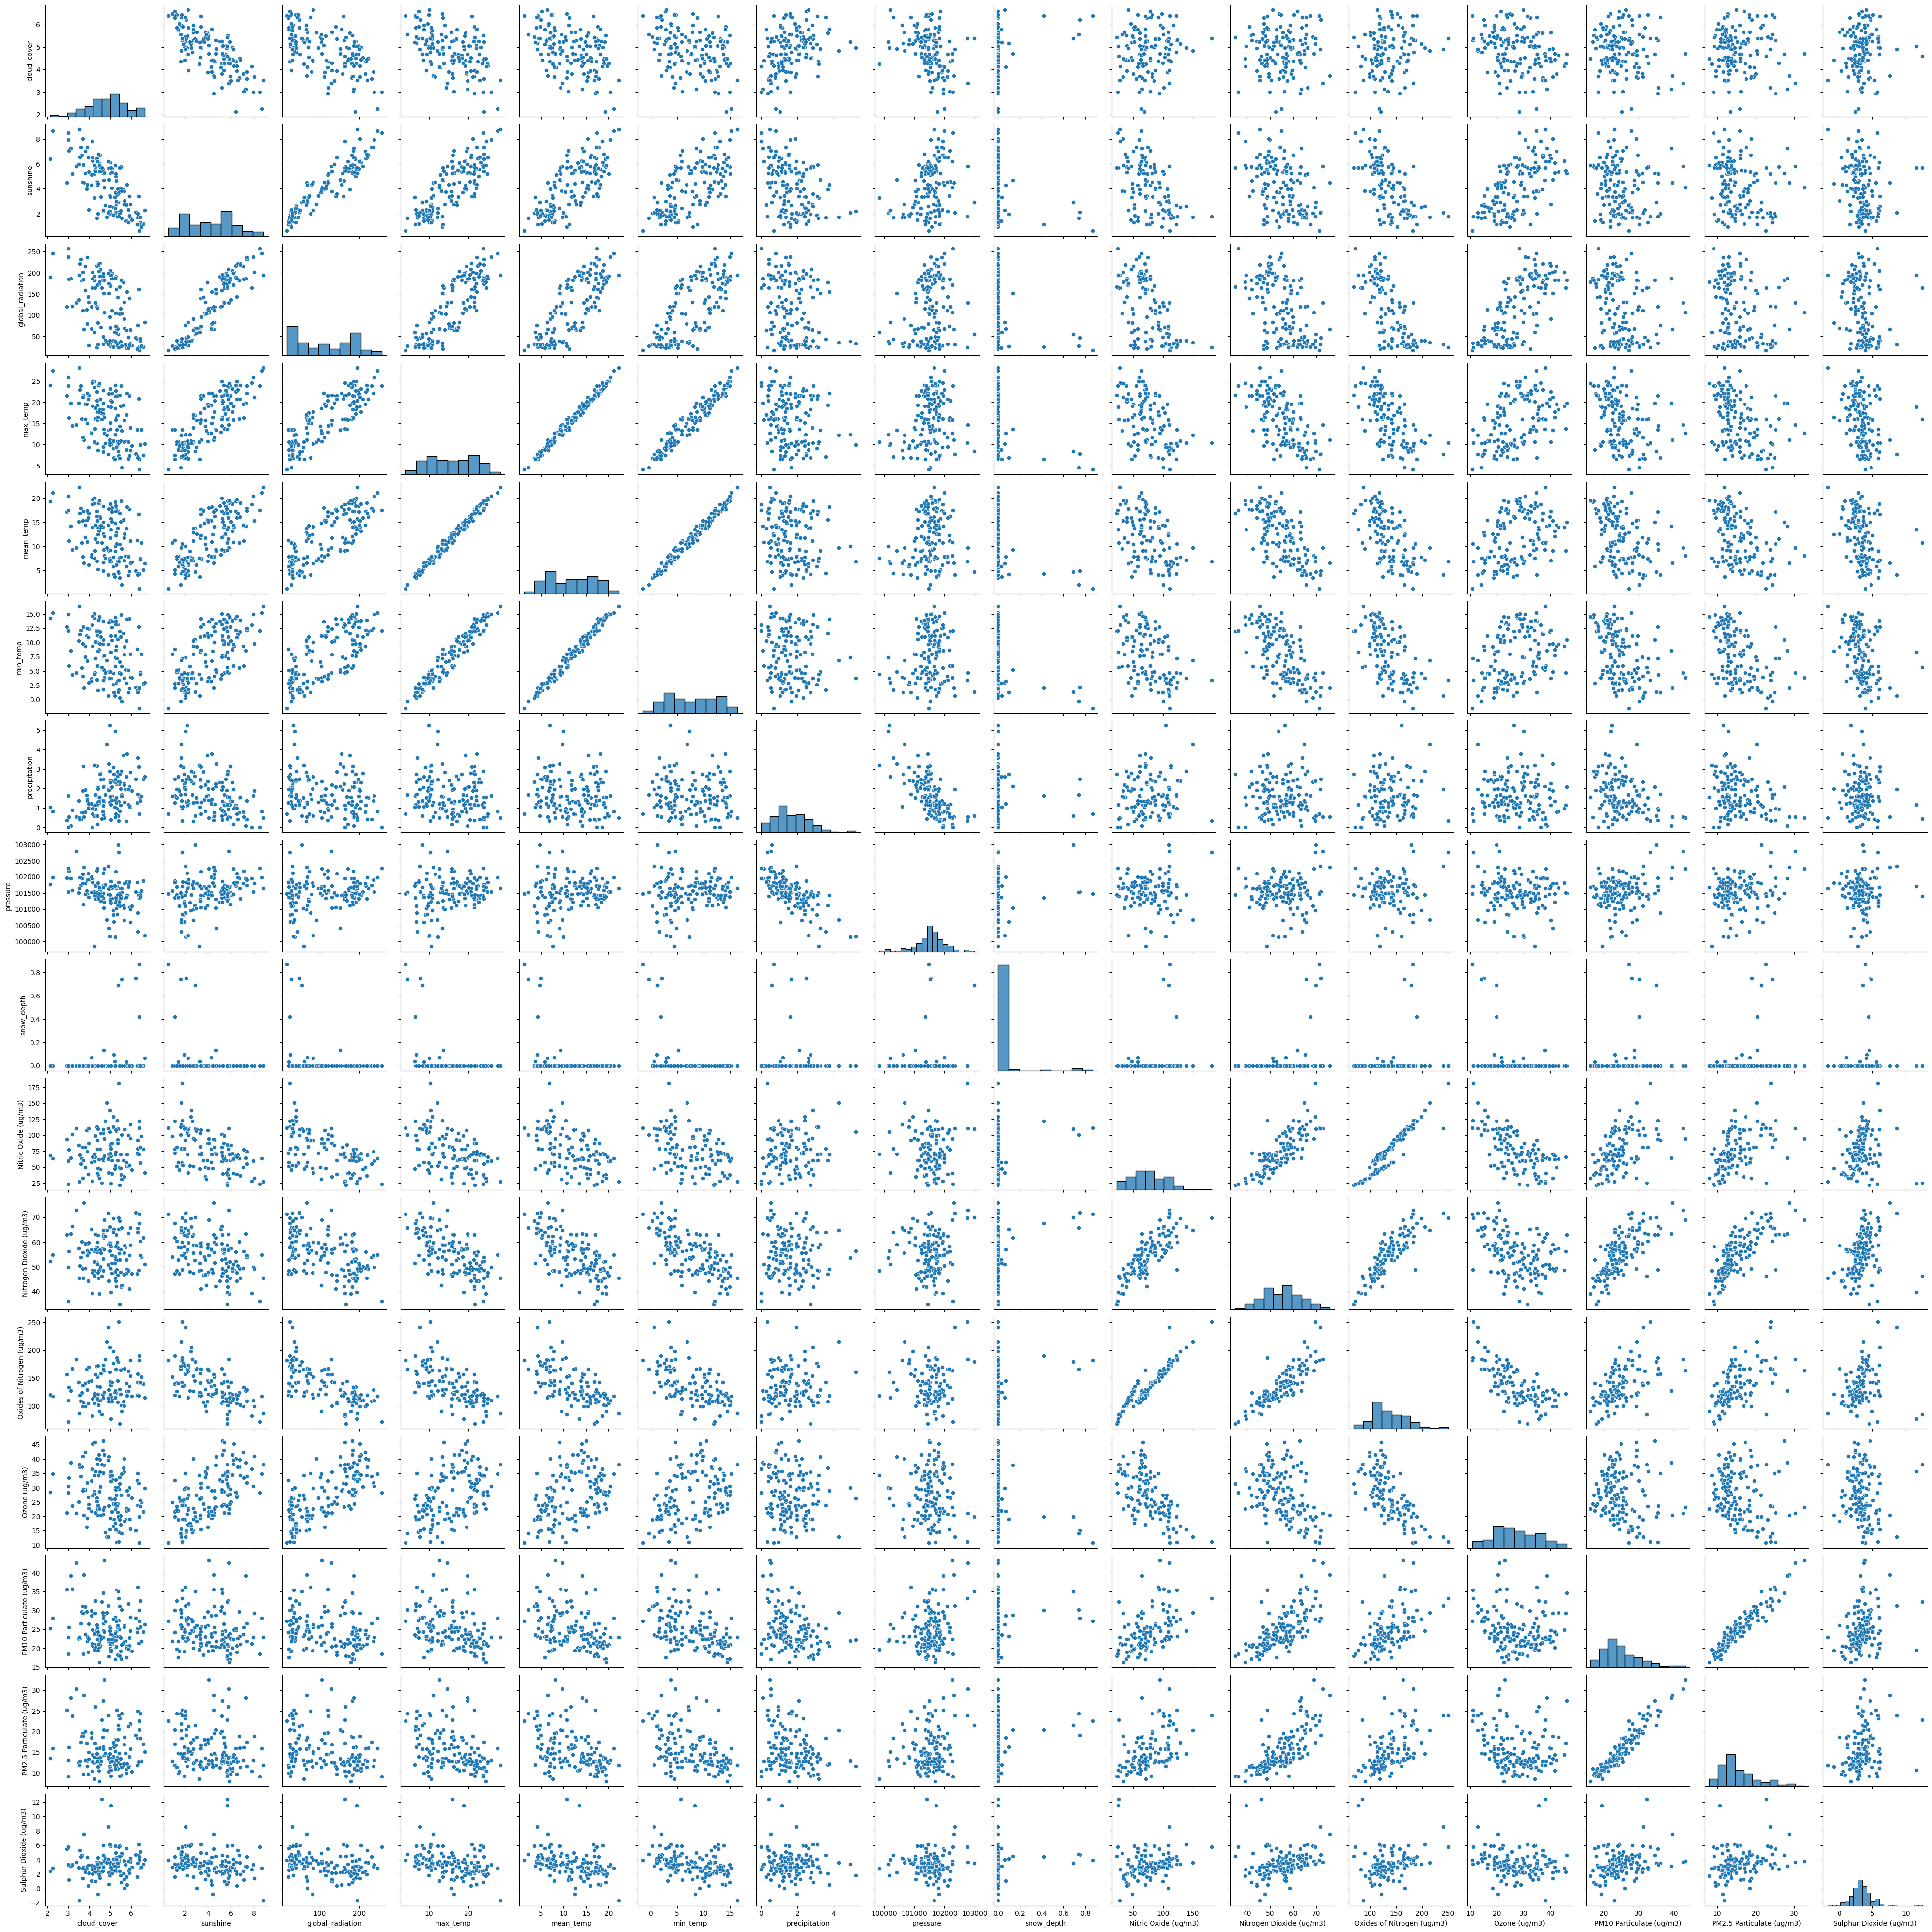

In [10]:
sns.pairplot(dataCompare, kind="scatter")
plt.show()

# Pair plot of all variables just for comparison in the case of any other correlations

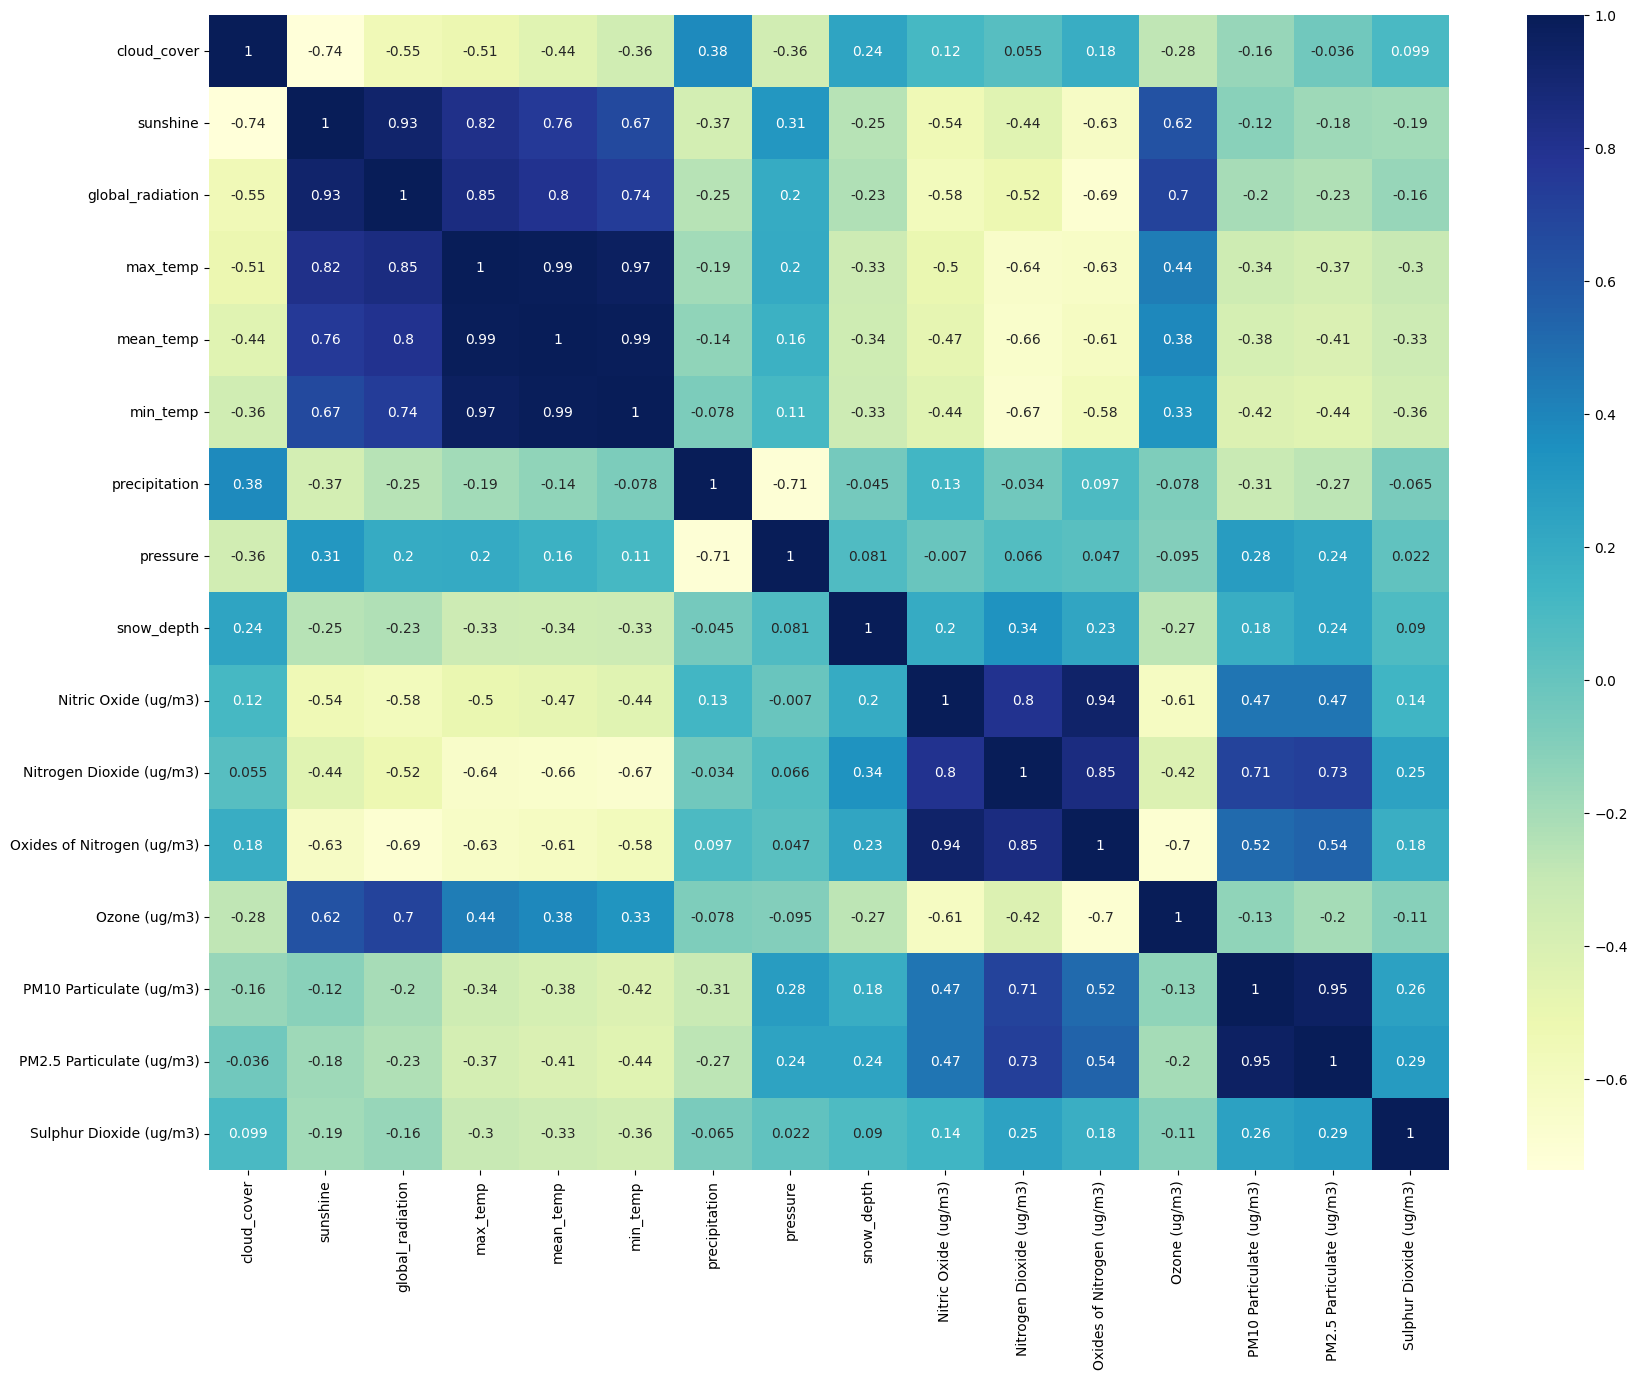

In [11]:
corrData = dataCompare.corr("pearson")
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrData, cmap="YlGnBu",annot=True, ax=ax)
plt.show()
# correlation matrix (below) and heatmap of all variables just for comparison in the case of any other correlations
#correlations of note - sunshine and ozone, nitrogen dioxide and temperature (?)

In [25]:
import sklearn as sk

#Linear Regression prep - selecting data of the two variables to be compared while cutting out any nan values
X = dataCompare.dropna(axis=0, how='any').loc[:, ["Oxides of Nitrogen (ug/m3)"]].select_dtypes(include=['int64','float64'])
y = dataCompare.dropna(axis=0, how='any').loc[:, ['Ozone (ug/m3)']].select_dtypes(include=['int64','float64'])

#splitting data into test and train groups
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, random_state=2763, test_size=.1)

#setting up model and training it
lr = sk.linear_model.LinearRegression()
lr.fit(X_train, y_train)

#R-squared test
rSq = lr.score(X_train, y_train)
print(rSq)

#

0.46812637294538384


6.393354027875143
Percentage of Error: Ozone (ug/m3)    21.467392
dtype: float64 %


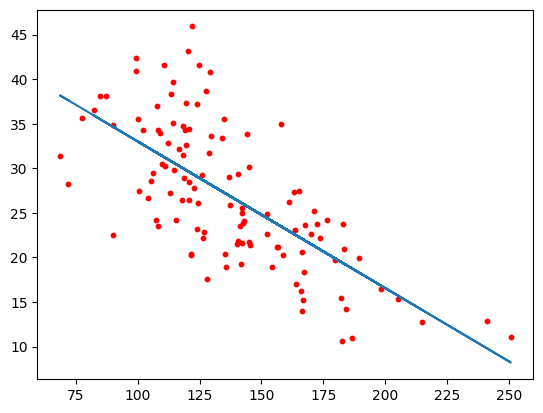

In [13]:
# testing regression model with percentage error
y_pred = lr.predict(X_test)
error_sq = sk.metrics.mean_squared_error(y_test, y_pred)
error = np.sqrt(error_sq)

print(error)
print(f"Percentage of Error: {error*100/y_test.mean()} %")

#plotting a graph for the linear regression
plt.scatter(X,y, color="red", s=10)
plt.plot(X,lr.predict(X))
plt.show()